# Zestaw 2. Interpolacja

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi, sqrt

## 1. Wielomiany interpolujące

Dla funkcji f (x) = 1/(1+x^2) i n = 5, 10, 15 wylicz wielomian interpolacyjny p_n z n + 1
węzłami równoodległymi w przedziale [−5, 5].


a) Narysuj funkcje f(x) oraz p(x) <br>
b) Wylicz i narysuj reszty interpolacji epsilon(x) = f(x) − p(x) w 30 równoodległych
punktach powyższego przedziału.

In [62]:
ns = [5, 10, 15]
f = lambda x: 1/(1+x**2)

def interpolate(f, xs):
    n = len(xs)
    fs = f(xs)
    
    def l(x, k):
        result = 1
        for i in range(n):
            if i == k: continue
            result *= (x - xs[i])
            result /= (xs[k] - xs[i])
        return result
    
    def p(x):
        result = 0
        for i in range(n):
            result += fs[i]*l(x, i)
        return result
    
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(10, 5)
            
    ax[0].plot(xs, fs, marker='o', linestyle='', zorder=10, color = 'darkgoldenrod', markersize=8)
    x_axis = np.linspace(-5, 5, 300)
    
    ax[0].plot(x_axis, f(x_axis), color="darkgoldenrod")
    ax[0].plot(x_axis, p(x_axis), color="mediumseagreen")
    ax[0].legend(["points of interpolation", "f(x)", "p(x)"])
    plt.ylim(-7, 7)
    ax[1].plot(x_axis, p(x_axis) - f(x_axis))
    ax[1].legend(["epsilon(x)"])

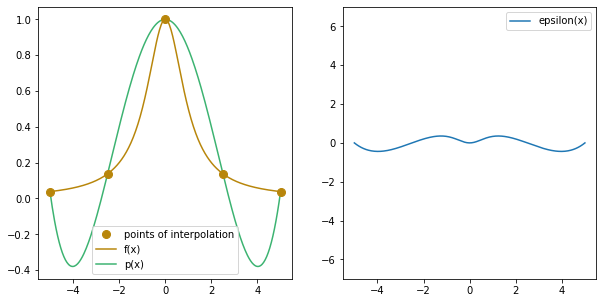

In [63]:
interpolate(f, np.linspace(start=-5, stop=5, num=5))

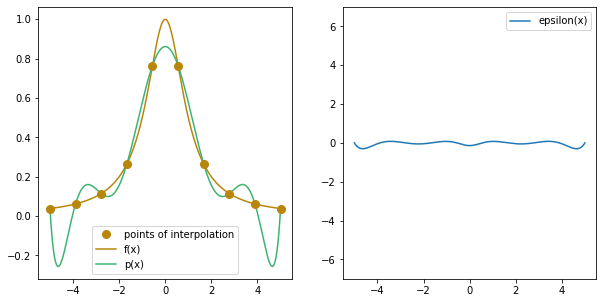

In [64]:
interpolate(f, np.linspace(start=-5, stop=5, num=10))

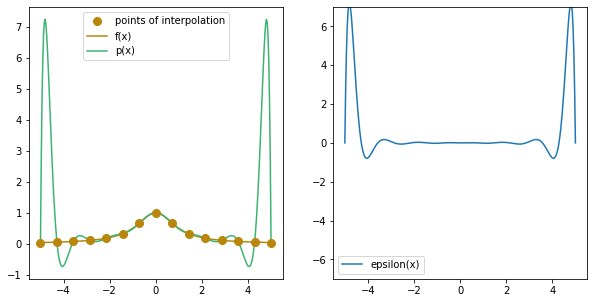

In [65]:
interpolate(f, np.linspace(start=-5, stop=5, num=15))

## 2. Wielomiany interpolujące
Dla danej funkcji i przedziału z poprzedniego zadania oraz n = 15 znajdź wielomian
interpolacyjny w węzłach Czebyszewa, danych wzorem x<sub>k</sub> = 0.5(a+b)+ 0.5(b−a)cos((2k−1)/(2n)π), gdzie k = 1, .., n, a a, b są odpowiednio początkiem i końcem przedziału interpolacji.

Narysuj wykres wynikowego wielomianu. W jaki sposób zmienił się błąd interpolacji w porównaniu do wyników z poprzedniego zadania? Czemu tak się stało?

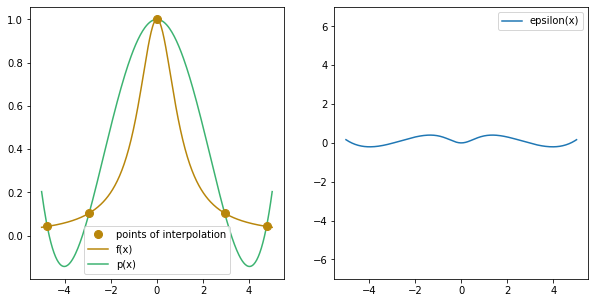

In [66]:
n = 5
xs = np.array([0.5*(5-(-5))*cos((2*k-1)/(2*n)*pi) for k in range(1, n+1)])
interpolate(f, xs)

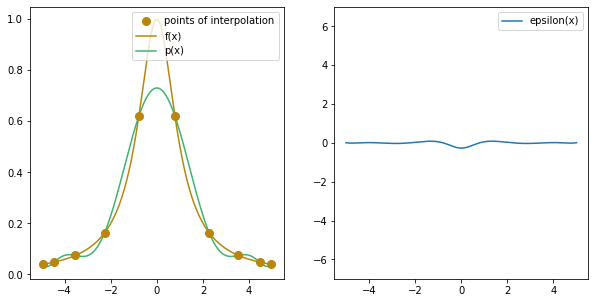

In [67]:
n = 10
xs = np.array([0.5*(5-(-5))*cos((2*k-1)/(2*n)*pi) for k in range(1, n+1)])
interpolate(f, xs)

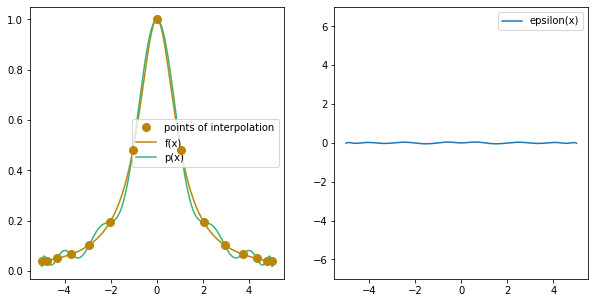

In [68]:
n = 15
xs = np.array([0.5*(5-(-5))*cos((2*k-1)/(2*n)*pi) for k in range(1, n+1)])
interpolate(f, xs)

<p style="text-align: justify">Zmieniając punkty interpolacji na węzly Czebyszewa błąd dla n=15 znacznie zmalał. Nie obserwujemy obszarów, w których błąd jest nieproporcjonalnie duży, tak jak to było dla węzów równoodległych. Wynika to z tego, iż stosując punkty specjalnie dobrane, rozwiązaliśmy problem efektu Rungego. </p>

## 3. Interpolacja krzywych funkcjami sklejanymi

Mając daną elipsę w postaci parametrycznej <br>
> x = a cos(t) <br>
> y = b sin(t) <br>
  
gdzie t ∈ [0, 2π] wykonaj jej interpolację sześciennymi funkcjami sklejanymi dla 10 równoodległych wartości t_i. Interpolację wykonaj osobno dla zbiorów punktów (t_i, x_i) oraz (t_i, y_i), a następnie narysuj przybliżenie powyższej elipsy używając wyznaczonych funkcji
dla 30 punktów.

In [74]:
n = 10
a = 1
b = 1

x = lambda t: a*cos(t)
y = lambda t: b*sin(t)

In [75]:
ts = np.linspace(start=0, stop=2*np.pi, num=n)

In [76]:
h = np.pi/(n-1)

def s_bis(i):

In [77]:
def s(i, t, var):
    s_bis(i, ts[i])/(6*h)*(ts[i+1]-t)**3 
    + s_bis(i)/(6*h)*(t-ts[i])**3 
    + (var(ts[i+1])/h-s_bis(i, ts[i+1])*h/6)*(t-ts[i])
    + (var(ts[i])/h - s_bis(i, ts[i])*h/6)*(ts[i+1] - t)

In [112]:
def delta(var, i):
    return (var(i+1)-var(i))/h

In [113]:
delta_1_3 = 1 ##!!

In [131]:
n = 10
A = np.zeros(shape=(n-1, n-1))
B = np.zeros(n-1)

for i in range(1, n-1):
    A[i][i-1] = h
    A[i][i] = 2*h
    if (i+1 < n-1):
        A[i][i+1] = h
    B[i] = delta(x, i+1) - delta(x, i)

A[0][0] = -h
A[0][1] = h
B[0] = 1

print(A)
print(B)

sigmas = np.linalg.solve(A, B)

[[-0.31415927  0.31415927  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.31415927  0.62831853  0.31415927  0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.31415927  0.62831853  0.31415927  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.31415927  0.62831853  0.31415927  0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.31415927  0.62831853  0.31415927
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.31415927  0.62831853
   0.31415927  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.31415927
   0.62831853  0.31415927  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.31415927  0.62831853  0.31415927]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.31415927  0.62831853]]
[ 1.          1.21786471  2.89